In [109]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import plotly
plotly.offline.init_notebook_mode(connected = True) #so that it plots locally
from datetime import date
from sklearn.linear_model import LinearRegression, HuberRegressor

from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.api import OLS

In [110]:
ames = pd.read_csv('Data/Clean_Ames_Housing_Price.csv', index_col=0)
ames.isnull().sum()[0:90]
ames['LotFrontage'].value_counts()
# Apply mask/filter to examine only null values.
lot_nulls = ames[ames['LotFrontage'].isna()] #lots with no linear feet of street connected to property
lot_nulls
ames['LotFrontage'].isna().sum()
# Group lots by configuration
grouped_lots = ames.groupby(['LotConfig']).agg({
   'LotFrontage' : 'mean', 
})
grouped_lots

#replace np.nan with average for lot_config of that type
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'Corner'), 'LotFrontage'] = 81.468023
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'CulDSac'), 'LotFrontage'] = 56.456790        
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'FR2'), 'LotFrontage'] = 59.413793        
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'FR3'), 'LotFrontage'] = 79.3       
ames.loc[(ames['LotFrontage'].isna()) & (ames['LotConfig'] == 'Inside'), 'LotFrontage'] = 66.633846

print(ames['LotFrontage'].isna().sum())

ames['LotFrontage'].sort_values().tail()

ames['Alley'] = ames['Alley'].replace(np.nan, 'NA')

ames['Alley'].value_counts()


ames['BsmtQual'] = ames['BsmtQual'].replace(np.nan, 'NA')

ames['BsmtCond'] = ames['BsmtCond'].replace(np.nan, 'NA')

ames['BsmtExposure'] = ames['BsmtExposure'].replace(np.nan, 'NA')

ames['BsmtFinType1'] = ames['BsmtFinType1'].replace(np.nan, 'NA')

ames['BsmtFinSF1'] = ames['BsmtFinSF1'].replace(np.nan, 0)

ames['BsmtFinType2'] = ames['BsmtFinType2'].replace(np.nan, 'NA')

ames['BsmtFinSF2'] = ames['BsmtFinSF2'].replace(np.nan, 0)

ames['BsmtUnfSF'] = ames['BsmtUnfSF'].replace(np.nan, 0)

ames['TotalBsmtSF'] = ames['TotalBsmtSF'].replace(np.nan, 0)

ames['BsmtFullBath'] = ames['BsmtFullBath'].replace(np.nan, 0)

ames['BsmtHalfBath'] = ames['BsmtHalfBath'].replace(np.nan, 0)



#ames.loc[(ames['Electrical'].isna())] = 'SBrkr'

ames['Electrical'] = ames['Electrical'].replace(np.nan, 'SBrkr')

ames['FireplaceQu'] = ames['FireplaceQu'].replace(np.nan, 'NA')

ames['GarageType'] = ames['GarageType'].replace(np.nan, 'NA')

ames['GarageYrBlt'] = ames['GarageYrBlt'].replace(np.nan, 'NA')

ames['GarageFinish'] = ames['GarageFinish'].replace(np.nan, 'NA')

ames['GarageCars'] = ames['GarageCars'].replace(np.nan, 0)

ames['GarageArea'] = ames['GarageArea'].replace(np.nan, 0)

ames['GarageQual'] = ames['GarageQual'].replace(np.nan, 'NA')

ames['GarageCond'] = ames['GarageCond'].replace(np.nan, 'NA')

ames['PoolQC'] = ames['PoolQC'].replace(np.nan, 'NA')

ames['Fence'] = ames['Fence'].replace(np.nan, 'NA')

ames['MiscFeature'] = ames['MiscFeature'].replace(np.nan, 'NA')




ames.loc[ames['GarageQual'].isna()]

ames['Electrical'].value_counts()



# Inspect the property records to see front façades
# https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=2&PageID=1104
ames['MasVnrType'].loc[176] = "Stone"
ames['MasVnrType'].loc[359] = "None"
ames['MasVnrType'].loc[754] = "None"
ames['MasVnrType'].loc[788] = "None"
ames['MasVnrType'].loc[872] = "None"
ames['MasVnrType'].loc[892] = "None"
ames['MasVnrType'].loc[952] = "Stone"
ames['MasVnrType'].loc[1042] = "None"
ames['MasVnrType'].loc[1162] = "None"
ames['MasVnrType'].loc[1356] = "None"
ames['MasVnrType'].loc[1554] = "None"
ames['MasVnrType'].loc[2034] = "None"
ames['MasVnrType'].loc[2478] = "None"
ames['MasVnrType'].loc[2537] = "None"

# For the properties with partial height stone façade, assume 4 ft height,
# and for full height, assume 8 ft height
# Assume façade length is the 1.618 length of a house built in the footprint of a golden ration
# sqrt(1.618 * 1stFlrSF)
ames['MasVnrArea'].loc[176] = 4 * (1.618 * ames.loc[176]['1stFlrSF']) ** 0.5
ames['MasVnrArea'].loc[359] = 0
ames['MasVnrArea'].loc[754] = 0
ames['MasVnrArea'].loc[788] = 0
ames['MasVnrArea'].loc[872] = 0
ames['MasVnrArea'].loc[892] = 0
ames['MasVnrArea'].loc[952] = 8 * (1.618 * ames.loc[176]['1stFlrSF']) ** 0.5
ames['MasVnrArea'].loc[1042] = 0
ames['MasVnrArea'].loc[1162] = 0
ames['MasVnrArea'].loc[1356] = 0
ames['MasVnrArea'].loc[1554] = 0
ames['MasVnrArea'].loc[2034] = 0
ames['MasVnrArea'].loc[2478] = 0
ames['MasVnrArea'].loc[2537] = 0






0


C:\Users\Monika\AppData\Local\Temp\ipykernel_27724\1007421134.py:91: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Monika\AppData\Local\Temp\ipykernel_27724\1007421134.py:92: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Monika\AppData\Local\Temp\ipykernel_27724\1007421134.py:93: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Monika\AppData\Local\Temp\ipykernel_27724\1007421134.py:94: SettingWithCopyWarning:



In [111]:
#Analysis of Ames_HousePrice.csv starts here
data_House_price=ames
data_House_price

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,81.468023,7890,Pave,NA,Reg,...,166,0,NA,NA,NA,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.000000,4235,Pave,NA,Reg,...,0,0,NA,NA,NA,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.000000,8146,Pave,NA,Reg,...,111,0,NA,NA,NA,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.000000,8400,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,903205040,952,121000,30,RL,66.633846,8854,Pave,NA,Reg,...,40,0,NA,NA,NA,0,5,2009,WD,Normal
2577,905402060,1733,139600,20,RL,56.456790,13680,Pave,NA,IR1,...,0,0,NA,NA,NA,0,6,2009,WD,Normal
2578,909275030,2002,145000,90,RH,82.000000,6270,Pave,NA,Reg,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
2579,907192040,1842,217500,60,RL,66.633846,8826,Pave,NA,Reg,...,0,0,NA,NA,NA,0,7,2007,WD,Normal


In [112]:
pid=data_House_price.PID.unique()
data_House_price['PID'].value_counts()
data_House_price.shape

(2580, 81)

In [113]:
#removing duplicates
duplicate_obersvation = data_House_price[data_House_price.duplicated()]
duplicate_obersvation
data_House_price=data_House_price.drop_duplicates(subset=None, keep='first', inplace=False)
duplicate_obersvation = data_House_price[data_House_price.duplicated()]
duplicate_obersvation

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [57]:
data_House_price.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,81.468023,7890,Pave,NA,Reg,...,166,0,NA,NA,NA,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.000000,4235,Pave,NA,Reg,...,0,0,NA,NA,NA,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.000000,8146,Pave,NA,Reg,...,111,0,NA,NA,NA,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.000000,8400,Pave,NA,Reg,...,0,0,NA,NA,NA,0,11,2009,WD,Normal


In [114]:
#creating new column since built or remodeled
data_House_price['YearRemodAdd']
todays_date = date.today()
data_House_price['YearSinceBuiltRemodeled']=data_House_price['YrSold']-data_House_price['YearRemodAdd']
data_House_price['YearSinceBuiltRemodeled']

C:\Users\Monika\AppData\Local\Temp\ipykernel_27724\3568430926.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1       60
2       25
3        0
4        6
5        8
        ..
2576    59
2577    54
2578    57
2579     7
2580    12
Name: YearSinceBuiltRemodeled, Length: 2579, dtype: int64

In [115]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
#Numerical:
#LotArea, GrLivArea, YearBuilt,BedroomAbvGr,

#Nominal Categorical:
    
    #BldgType :1Fam,2FmCon,TwnhsE,Twnhs,Duplex
    #OverallQual
    #OverallCond
    #LandSlope: Gtl,Mod,Sev
    
#conditional:
    #PavedDrive,MSZoning
    
multi_linear_var=data_House_price[['SalePrice','LotArea', 'GrLivArea', 'BedroomAbvGr','LandSlope','YearBuilt','MSZoning','BldgType','OverallQual','OverallCond','PavedDrive']]    

multi_linear_var

enc = OrdinalEncoder()
enc.fit(multi_linear_var[["OverallQual","BldgType","OverallCond","LandSlope"]])
multi_linear_var[["OverallQual","BldgType","OverallCond","LandSlope"]] = enc.transform(multi_linear_var[["OverallQual","BldgType","OverallCond","LandSlope"]])


multi_linear_var = pd.get_dummies(multi_linear_var, columns = ['PavedDrive'],drop_first = True)
multi_linear_var = pd.get_dummies(multi_linear_var, columns = ['MSZoning'],drop_first = True)

x2=multi_linear_var.iloc[: , 1:]
y2=multi_linear_var['SalePrice']

ols2 = linear_model.LinearRegression()
lm_test2=ols2.fit(x2, y2)
print(lm_test2.score(x2, y2))
###################Summary

features2 = sm.add_constant(x2)
ols_sm2   = OLS(y2,features2)
lm_test2_1    = ols_sm2.fit()

print(lm_test2_1.summary())


0.8116536008490596
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     690.0
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        10:14:51   Log-Likelihood:                -30458.
No. Observations:                2579   AIC:                         6.095e+04
Df Residuals:                    2562   BIC:                         6.105e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.2

C:\Users\Monika\AppData\Local\Temp\ipykernel_27724\233612721.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Monika\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [116]:
#Removing Mszoning FV, C,I,A
print(data_House_price['MSZoning'].unique())

data_House_price = data_House_price[(data_House_price['MSZoning']!='FV')]
data_House_price = data_House_price[(data_House_price['MSZoning']!='C (all)')]
data_House_price = data_House_price[(data_House_price['MSZoning']!='I (all)')]
data_House_price = data_House_price[(data_House_price['MSZoning']!='A (agr)')]

print(data_House_price['MSZoning'].unique())


['RL' 'C (all)' 'RM' 'FV' 'RH' 'I (all)' 'A (agr)']
['RL' 'RM' 'RH']


In [117]:
print(data_House_price['SaleCondition'].unique())
data_House_price = data_House_price[(data_House_price['SaleCondition']=='Normal')]
data_House_price['SaleCondition'].unique()

data_House_price=data_House_price.drop(['Street','MiscFeature','Utilities'], axis=1)
data_House_price.shape

['Normal' 'Partial' 'AdjLand' 'Abnorml' 'Alloca' 'Family']


(2305, 79)

In [119]:
def get_season(mnth):
    if (mnth in {12,1,2}):
        return("Winter")
    if (mnth in {3,4,5}):
        return("Spring")
    if (mnth in {6,7,8}):
        return("Summer")
    if (mnth in {9,10,11}):
        return("Autumn")

    
data_House_price['Season'] = data_House_price.apply (lambda row : get_season(row['MoSold']), axis=1)    
#print(get_season(data_orders['Order.Date'][1]))

In [120]:
tmp=data_House_price

Norm      1982
Feedr      126
Artery      76
PosN        35
RRAn        35
RRAe        23
PosA        18
RRNn         6
RRNe         4
Name: Condition1, dtype: int64
     positive_condition2 positive_condition1
1                   Norm                Norm
2                   Norm                Norm
4                   Norm                Norm
5                   Norm                Norm
6                   Norm                Norm
...                  ...                 ...
2576                Norm                Norm
2577                Norm                Norm
2578                Norm                Norm
2579                Norm                Norm
2580                Norm                Norm

[2305 rows x 2 columns]


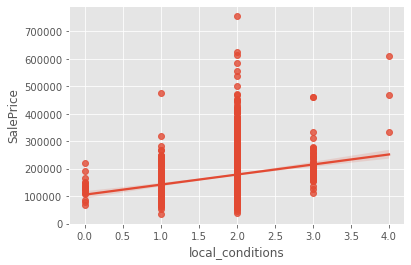

In [121]:
tmp['Alley']=tmp['Alley'].replace({'Grvl':1, 'Pave': 1, 'NA': 0})
tmp['CentralAir']=tmp['CentralAir'].replace({'Y': 1, 'N': 0})

####################merging condition1 and condition2 into one feature###################################
#2 if by positive feature, 1 if normal, 0 if negative feature. 
import seaborn as sns
print(tmp['Condition1'].value_counts())
tmp['Condition2'].unique()

tmp['positive_condition1'] = tmp['Condition1']
tmp['positive_condition2'] = tmp['Condition2']
tmp_condition_columns = tmp[['positive_condition2', 'positive_condition1']]

print(tmp_condition_columns)

dict_ordinal = {
   'Artery':0,
    'RRNe':0,
    'RRAe':0,
    'Feedr':0,
    'RRAn':0,
    'Norm':1,
    'RRNn':0,
    'PosN':2,
    'PosA':2,
        }
# #loop to get the job done
for i in tmp_condition_columns.columns:
    tmp.replace({i: dict_ordinal},inplace = True)
tmp['local_conditions'] = tmp['positive_condition1']+tmp['positive_condition2'] #this a combined measure of local features. Railroads and busy streets are just not quite as nice
#to live by as are greenbelts and parks and even normal places
sns.regplot(x=tmp['local_conditions'],y=tmp['SalePrice'])
tmp=tmp.drop(['positive_condition1','positive_condition2'],axis=1)

###########################################################################################################

tmp['Electrical']=tmp['Electrical'].replace({'SBrkr':1, 'FuseA': 0, 'FuseF': 0, 'FuseP': 0})
tmp['PavedDrive']=tmp['PavedDrive'].replace({'Y':1, 'N': 0, 'P': 0})

###################################################################################################
tmp['SaleType']=tmp['SaleType'].replace({'WD':'Warranty_Deed', 'CWD': 'Warranty_Deed', 'VWD': 'Warranty_Deed',
                                     'Con':'Contract', 'ConLw':'Contract', 'ConLI':'Contract',
                                     'ConLD':'Contract', 'New':'Other', 'COD':'Other', 'Oth':'Other' })

###############################################################################################################
tmp['PoolArea']=tmp['PoolArea'].where(tmp['PoolArea'] == 0, 1)
###############################################################################################################


In [79]:
tmp1=tmp
tmp1.shape

(2305, 81)

In [122]:
data_House_price=tmp

In [ ]:
########################################Add all cleaning before this######################################################

In [123]:
# Decide how to map string values to numerical values for ordinal variables
Ordstr = ['ExterQual','ExterCond', \
            'BsmtQual','HeatingQC','KitchenQual', \
              'Fence','MasVnrType','LotShape','Foundation','GarageFinish']

ord2dummies01 = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}
ord_vars01 = ['ExterQual','ExterCond','HeatingQC','KitchenQual']

ord2dummies02 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, "NA":0}
ord_vars02 = ['BsmtQual']

# ord2dummies03 = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
# ord_vars03 = ['BsmtExposure']

# ord2dummies04 = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
# ord_vars04 = ['BsmtFinType1','BsmtFinType2']


ord2dummies06 = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
ord_vars06 = ['Fence']

ord2dummies07 = {'Stone':4,'BrkCmn':3,'BrkFace':2,'CBlock':1,'None':0}
ord_vars07 = ['MasVnrType']

ord2dummies08 = {'Reg':3,'IR1':2,'IR2':1,'IR3':0}
ord_vars08 = ['LotShape']

# ord2dummies09 = {'PConc':5,'Slab':4,'CBlock':3,'BrkTil':2,'Stone':1,'Wood':0}
# ord_vars09 = ['Foundation']

ord2dummies10 = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
ord_vars10 = ['GarageFinish']



In [ ]:
# Map the values in the dataframe
for i in ord_vars01:
    data_House_price[i].replace(ord2dummies01, inplace=True)

for i in ord_vars02:
    data_House_price[i].replace(ord2dummies02, inplace=True)
    
# for i in ord_vars03:
#     data_House_price[i].replace(ord2dummies03, inplace=True)

# for i in ord_vars04:
#     data_House_price[i].replace(ord2dummies04, inplace=True)    

for i in ord_vars06:
    data_House_price[i].replace(ord2dummies06, inplace=True)
    
for i in ord_vars07:
    data_House_price[i].replace(ord2dummies07, inplace=True)

for i in ord_vars08:
    data_House_price[i].replace(ord2dummies08, inplace=True)

# for i in ord_vars09:
#     data_House_price[i].replace(ord2dummies09, inplace=True)
    
for i in ord_vars10:
    data_House_price[i].replace(ord2dummies10, inplace=True)
    
# Assign a binary value for whether or not a house has a pool
#data_House_price.loc[data_House_price['PoolArea'] > 0] = 1

In [124]:
data_House_price[Ordstr]
data_House_price.columns[data_House_price.isin(['NA']).any()]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence'],
      dtype='object')

In [83]:
data_House_price.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [125]:
Nomstr = ['MSZoning','Alley','LandContour', \
               'LotConfig','Neighborhood','local_conditions', \
               'HouseStyle','RoofStyle', 'MasVnrType', \
               'CentralAir','Electrical', \
               'PavedDrive','SaleType','PoolArea','Foundation','Season']
for i in Nomstr:   
    dummy = pd.get_dummies(data_House_price[i], prefix=i, prefix_sep='__')
    dummy = dummy.drop(i+'__'+str(data_House_price[i].mode()[0]), axis=1)
    data_House_price = pd.concat([data_House_price.drop(i, axis=1), dummy], axis=1)

In [86]:
data_House_price

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,Condition1,Condition2,...,Electrical__0,PavedDrive__0,SaleType__Contract,SaleType__Other,PoolArea__1,Foundation__BrkTil,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood
1,909176150,856,126000,30,81.468023,7890,Reg,Gtl,Norm,Norm,...,0,0,0,0,0,0,0,0,0,0
2,905476230,1049,139500,120,42.000000,4235,Reg,Gtl,Norm,Norm,...,0,0,0,0,0,0,0,0,0,0
4,535377150,1039,114000,70,80.000000,8146,Reg,Gtl,Norm,Norm,...,0,1,0,0,0,1,0,0,0,0
5,534177230,1665,227000,60,70.000000,8400,Reg,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,0
6,908128060,1922,198500,85,64.000000,7301,Reg,Gtl,Norm,Norm,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,903205040,952,121000,30,66.633846,8854,Reg,Gtl,Norm,Norm,...,1,1,0,0,0,1,0,0,0,0
2577,905402060,1733,139600,20,56.456790,13680,IR1,Gtl,Norm,Norm,...,1,0,0,0,0,0,0,1,0,0
2578,909275030,2002,145000,90,82.000000,6270,Reg,Gtl,Norm,Norm,...,1,0,0,0,0,0,0,0,0,0
2579,907192040,1842,217500,60,66.633846,8826,Reg,Gtl,Norm,Norm,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
##########################Nearest Neighbor here##################################
# tmp1=data_House_price
# from sklearn.neighbors import NearestNeighbors
# X_nei = tmp1['Neighborhood']
# X_nei.unique()
# n_nei=X_nei.shape[0]//6
# neigh = NearestNeighbors(n_neighbors=n_nei)
# neigh.fit(X_nei)
# NearestNeighbors(n_neighbors=n_nei)
# A = neigh.kneighbors_graph(X)

In [126]:
missingCols = np.sum(data_House_price.isnull())

missingCols[missingCols>0]

Series([], dtype: int64)

In [127]:
list(data_House_price.columns)

['PID',
 'GrLivArea',
 'SalePrice',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleCondition',
 'YearSinceBuiltRemodeled',
 'MSZoning__RH',
 'MSZoning__RM',

In [128]:
x = data_House_price.drop(['PID','SalePrice','MSSubClass','Condition1','Condition2','BldgType','YearBuilt','YearRemodAdd','RoofMatl',\
                            'Exterior1st', 'Exterior2nd', 'MasVnrArea','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', \
                           'BsmtFinSF2',  'BsmtUnfSF','Heating', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath',\
                          'BedroomAbvGr',  'KitchenAbvGr','Functional','FireplaceQu', 'GarageType', 'GarageYrBlt',\
                           'GarageCars', 'GarageQual', 'GarageCond','PoolQC','MiscVal','MasVnrType__Stone',\
                           'MasVnrType__BrkCmn', 'MasVnrType__BrkFace','Alley__1','LotShape','MoSold'],axis=1)

x['GrLivArea']=np.log(x['GrLivArea'])
x['LotArea']=np.log(x['LotArea'])
x['TotalBsmtSF']=np.log(x['TotalBsmtSF']+0.001)
x['LotFrontage']=np.log(x['LotFrontage'])



x['1stFlrSF']=np.log(x['1stFlrSF'])


print('x:',np.log(x['GrLivArea']))

y = data_House_price['SalePrice']

y=np.log(y)

#to convert whatever strings your data might contain to numeric values. 
#If they're incompatible with conversion, they'll be reduced to NaNs.
x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)


#importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)


print("Intercept: %f" %LR.intercept_)
print("Coefficients: %s" %str(LR.coef_))
print("R^2: %f" %(LR.score(x_train,y_train)))
print("R^2: %f" %(LR.score(x_test,y_test)))



features20 = sm.add_constant(x_train)
ols_sm20   = OLS(y_train,features20)
lm_test20    = ols_sm20.fit()

print(lm_test20.summary())


x: 1       1.909879
2       1.939546
4       1.938168
5       2.003853
6       2.023020
          ...   
2576    1.925498
2577    2.009235
2578    2.028398
2579    2.017381
2580    2.022260
Name: GrLivArea, Length: 2305, dtype: float64
Intercept: 7.066267
Coefficients: [ 4.00734871e-01  3.42562037e-02  8.56865245e-02  4.80845879e+09
  6.97020408e-02  3.80989245e-02  2.13182215e+09  2.46908335e+09
  2.12306139e+09  1.42027289e-02  3.36080008e+08  5.59543222e-02
 -8.29696655e-05  1.19864941e-02  2.37250924e-02  8.90478034e+08
 -7.15470314e-03  3.01030874e-02  1.17223440e+08  1.81436539e-04
  8.39233398e-05  2.18391418e-04  5.41210175e-05  1.83582306e-04
  2.35080719e-04 -1.28903683e+07 -4.37423587e-05  7.58062405e+06
 -1.17349625e-03 -6.88105875e-02 -2.09555645e-02 -2.65326947e-02
  3.05550406e-02  4.40817438e-02 -2.13901838e-02  2.64781539e-03
 -4.59497906e-02 -2.52013372e-02  1.21423717e-01  7.06616947e-02
  6.24246043e-02  4.10324531e-02  7.46040083e-02  6.65152371e-02
  9.34798494e-0

C:\Users\Monika\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [129]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor().fit(x_train, y_train)
huber.score(x_test, y_test)


C:\Users\Monika\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



-0.823893338846466

In [130]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import datasets

In [131]:
ridge = Ridge()
ridge.fit(x_train, y_train)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
#pd.Series(ridge.coef_, index=house_features.columns)
ridge.score(x_test, y_test)

the ridge intercept is: 7.21


0.9260548523532982

In [99]:
lasso  = Lasso()
alphas = np.linspace(0.001,1.1,20)
lasso.set_params(normalize=False)
coefs_lasso  = []
score_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(x_train, y_train)  
        coefs_lasso.append(lasso.coef_)
        score_lasso.append(lasso.score(x_test, y_test))

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = x.columns)  
#print(coefs_lasso.head())
score_lasso

C:\Users\Monika\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.

C:\Users\Monika\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.

C:\Users\Monika\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize 

[0.9211005886060663,
 0.7876133911727896,
 0.673556632213006,
 0.5806021607293975,
 0.580724274601164,
 0.5807552984745492,
 0.5806134534830795,
 0.5802987719746174,
 0.5798113389655144,
 0.5791510569143472,
 0.5783179258211159,
 0.5773119459112779,
 0.5761331170397102,
 0.5747814390920374,
 0.5732569120682598,
 0.571559535968377,
 0.5696893107923889,
 0.5676462365341632,
 0.5654303133315244,
 0.5630415411915181]

In [133]:
elasticnet = ElasticNet(alpha=0.00001, l1_ratio=0.5, normalize=True)
elasticnet.fit(x, y)
print(r'The R^2 is %.2f' %(elasticnet.score(x, y)))
elasticnet.coef_,  elasticnet.intercept_

The R^2 is 0.93


C:\Users\Monika\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.



(array([ 3.05587087e-01,  3.08859958e-02,  8.54594381e-02,  0.00000000e+00,
         7.05720407e-02,  3.48113733e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.25781332e-02,  0.00000000e+00,  1.17489235e-01,
        -7.59986781e-05,  2.23399834e-02,  2.67283101e-02,  0.00000000e+00,
        -4.65509650e-03,  3.29706017e-02,  0.00000000e+00,  1.80333401e-04,
         9.23510488e-05,  1.69842336e-04,  4.69995571e-05,  4.93518589e-05,
         2.03504381e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -1.24671824e-03, -4.21806436e-02, -1.61351242e-02, -2.56082396e-02,
         3.43911660e-02,  2.07150179e-02, -1.81043845e-02,  1.20421846e-02,
        -2.89247923e-02, -2.42651943e-02,  8.46825403e-02,  9.37654694e-02,
         2.51597301e-02,  2.44591605e-02,  6.64724771e-02,  5.16885024e-02,
         8.73413028e-02, -3.81787306e-02,  2.77450169e-02,  1.49416035e-01,
         5.72165492e-01, -3.62300832e-02, -0.00000000e+00, -4.02429664e-02,
         1.5

In [134]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

0.909973016294088

In [ ]:
#Import svm model
from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(x_train, y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(x_test)



# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))